In [137]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']
import tensorflow as tf

In [138]:
beijing_pm = '../data/beijing_pm25.csv'
bike_hour = '../data/bike_hour.csv'
solar_energy = '../data/solar_energy_1.csv'
nsw2013 = '../data/NSW2013.csv'
nsw2016 = '../data/NSW2016.csv'


In [140]:
file_paths = os.listdir('../examples/data')

In [141]:
file_paths

['TAS2016.csv',
 'bike_hour.csv',
 'pollution.csv',
 'NSW2016.csv',
 'NSW2013.csv',
 'solar_energy_1.csv',
 'AirPassengers.csv',
 'beijing_pm25.csv',
 'traffic_data_in_bits.csv']

In [147]:
df_list = [pd.read_csv('../examples/data/'+file_path) for file_path in file_paths]

In [151]:
df_TAS2016, df_bike_hour, df_pollution, df_NSW2016, df_NSW2013, df_solar_energy, df_airpassengers, df_beijingpm, df_traffic = df_list

In [152]:
def ts_1dim(series, idx_start, idx_end, n_after, title, fname=False):
    
    fig, ax = plt.subplots()
    ls = len(series[idx_start:idx_end])
    ax.plot(list(range(1, ls+1)), series[idx_start:idx_end].values, 'b-')
    ax.plot(list(range(ls, ls+n_after+1)), series[idx_end-1: idx_end+n_after], 'r:')
#     ax.scatter(list(range(ls+1, ls+n_after+1)), series[idx_end: idx_end+n_after], color='red')
#     ax.set_xticks(list(range(1, ls+2)))
    ax.set_title(title)
    if fname:
        fig.savefig('./save/'+title+'.pdf', format='pdf')
    plt.close()
    return fig

In [153]:
for file, df in zip(file_paths, df_list):
    print(file)
    print(df.dtypes)
    print(df.head())
    print()

TAS2016.csv
REGION             object
SETTLEMENTDATE     object
TOTALDEMAND       float64
RRP               float64
PERIODTYPE         object
dtype: object
  REGION SETTLEMENTDATE  TOTALDEMAND     RRP PERIODTYPE
0   TAS1  2016/1/1 0:30      1034.88   98.52      TRADE
1   TAS1  2016/1/1 1:00      1035.77   99.25      TRADE
2   TAS1  2016/1/1 1:30       998.99   96.90      TRADE
3   TAS1  2016/1/1 2:00       974.48   99.37      TRADE
4   TAS1  2016/1/1 2:30       995.02  100.34      TRADE

bike_hour.csv
instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object
   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01     

<AxesSubplot:>

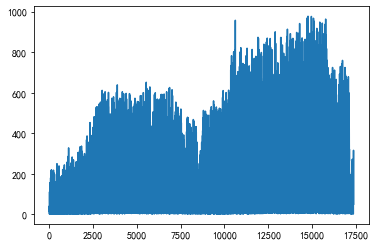

In [154]:
df_bike_hour.cnt.plot()

In [35]:
df_raw = pd.read_csv('../data/bike_hour.csv', index_col=0)

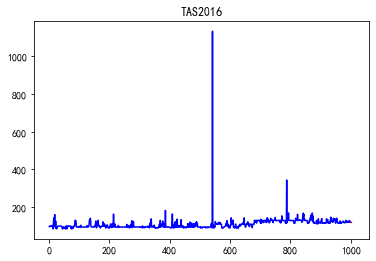

In [16]:
ts_1dim(df_TAS2016.RRP, 0, 1000, 10, 'TAS2016')

In [47]:
df_raw.weathersit.unique()

array([1, 2, 3, 4])

In [38]:
df_raw

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90


In [32]:
df_bike_hour.hum.count()

17379

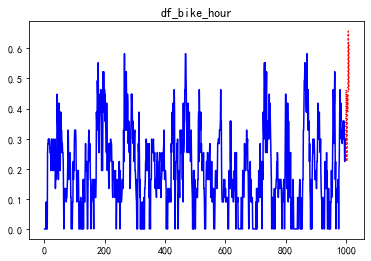

In [31]:
ts_1dim(df_bike_hour.windspeed, 0, 1000, 10, 'df_bike_hour')

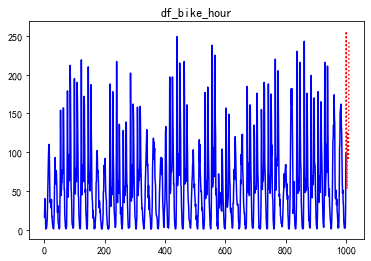

In [33]:
ts_1dim(df_bike_hour.cnt, 0, 1000, 10, 'df_bike_hour')

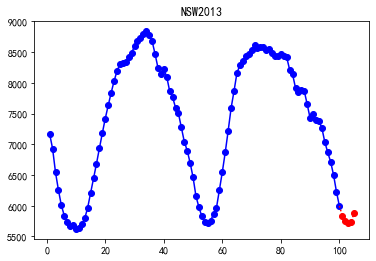

In [72]:
ts_1dim(df_NSW2013.TOTALDEMAND, 0, 100, 5, 'NSW2013')

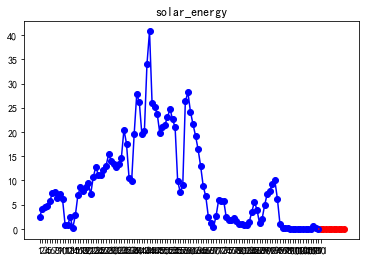

In [41]:
ts_1dim(df_solar_energy['Power(MW)'], 90, 200, 10, 'solar_energy')

In [172]:
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL
import statsmodels.api as sm

In [174]:
sm.graphics.tsa.plot_acf?

In [159]:
dateparse = lambda date: datetime.strptime(date, '%Y-%m')
airpassenger_df = pd.read_csv('../examples/data/AirPassengers.csv', parse_dates=['Month'], index_col='Month', date_parser=dateparse)

In [160]:
ts = airpassenger_df['#Passengers']

In [161]:
# decomposition = seasonal_decompose(ts, model="additive")
decomposition = STL(ts).fit()
# decomposition.plot()
# plt.show()
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

/home/haohy/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/haohy/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


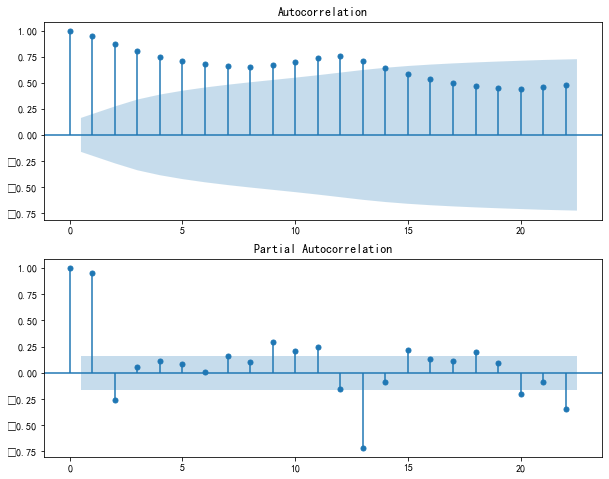

In [181]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
sm.graphics.tsa.plot_acf(ts.values, axes[0])
sm.graphics.tsa.plot_pacf(ts.values, axes[1])
plt.close()
fig

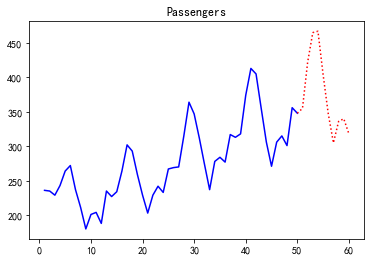

In [180]:
ts_1dim(df_airpassengers['#Passengers'], 50, 100, 10, 'Passengers')

/home/haohy/.local/lib/python3.6/site-packages/matplotlib/backends/_backend_pdf_ps.py:102: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=ft2font.LOAD_NO_HINTING)
/home/haohy/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/haohy/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


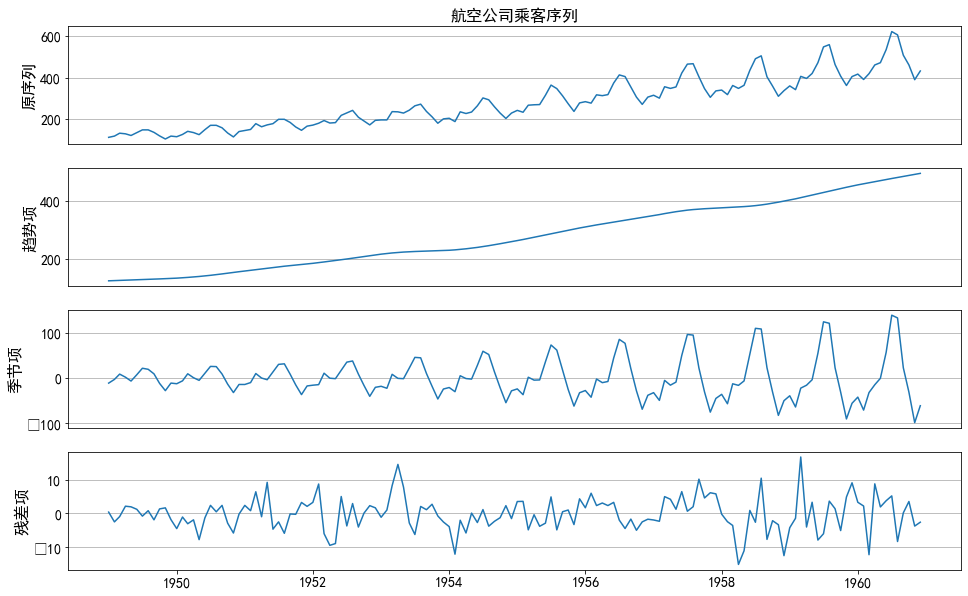

In [162]:
fig, axs = plt.subplots(4,1, figsize=(16, 10))
fs = 16
yfs = 14
axs[0].plot(ts)
axs[0].set_ylabel('原序列', fontsize=fs)
axs[0].tick_params('y', labelsize=yfs)
axs[0].set_xticks([])
axs[0].grid(True, axis='y')
axs[1].plot(trend)
axs[1].set_ylabel('趋势项', fontsize=fs)
axs[1].tick_params('y', labelsize=yfs)
axs[1].set_xticks([])
axs[1].grid(True, axis='y')
axs[2].plot(seasonal)
axs[2].set_ylabel('季节项', fontsize=fs)
axs[2].tick_params('y', labelsize=yfs)
axs[2].set_xticks([])
axs[2].grid(True, axis='y')
axs[3].plot(residual)
axs[3].set_ylabel('残差项', fontsize=fs)
axs[3].tick_params('y', labelsize=yfs)
axs[3].tick_params('x', labelsize=yfs)
axs[3].grid(True, axis='y')
axs[0].set_title('航空公司乘客序列', fontsize=fs)
axs
fig.savefig('airpassenger_STL.pdf', format='pdf')
plt.close()
fig

In [241]:
values = ts.values.reshape(12, 4, 3)

In [223]:
from sklearn.preprocessing import MinMaxScaler

In [243]:
scaler = MinMaxScaler(feature_range=(0, 1))

In [244]:
scaler = scaler.fit(values)

ValueError: Found array with dim 3. MinMaxScaler expected <= 2.

In [231]:
scaler.data_min_

array([104.])

In [232]:
scaler.data_max_

array([622.])

In [233]:
normalized = scaler.transform(values)

In [235]:
normalized[:5]

array([[0.01544402],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853]])

In [236]:
inversed = scaler.inverse_transform(normalized)

In [239]:
values[:5]

array([[112],
       [118],
       [132],
       [129],
       [121]])

In [238]:
inversed[:5]

array([[112.],
       [118.],
       [132.],
       [129.],
       [121.]])

In [246]:
arr = np.random.random((10,20,30))

In [249]:
shape_ori = arr.shape

In [250]:
arr_ = arr.reshape(20, 10, 30)

In [253]:
arr_inver = arr_.reshape(shape_ori)

In [256]:
tensor = tf.random.normal((10, 20))

In [260]:
arr = np.random.random((10, 20))

In [262]:
tf.reshape(arr, (20, 10))

TypeError: reshape() got an unexpected keyword argument 'dtype'

In [268]:
data_path = "../examples/results/2021-02-20 10:04:44.570022.pkl"

In [269]:
with open(data_path, 'rb') as f:
    data = pickle.load(f)

In [279]:
data['x_test'][-1].shape

TensorShape([168, 32])

In [282]:
data['x_test'][:, :, -7].shape

TensorShape([3438, 168])

In [283]:
Y = pd.Series([1,2,3,4])

In [289]:
pd.Series(np.random.random(10,))

0    0.283258
1    0.007721
2    0.909715
3    0.468142
4    0.441570
5    0.009818
6    0.833109
7    0.306740
8    0.750837
9    0.890636
dtype: float64

In [281]:
data['y_true'].shape

TensorShape([3438, 24])

In [276]:
type(data['y_true'].numpy())

numpy.ndarray

In [273]:
type(data['y_pred'])

numpy.ndarray

In [267]:
type(arr) == np.ndarray

True

In [259]:
tf.reshape(tensor, (20, 10))

<tf.Tensor: shape=(20, 10), dtype=float32, numpy=
array([[ 0.09321351, -0.0912293 ,  2.2396765 , -0.49750456, -0.2873602 ,
         1.892514  , -1.1087912 ,  0.4258742 ,  0.7408921 , -1.1919633 ],
       [ 0.40152416,  0.3002639 , -0.3067981 ,  0.6547144 , -0.25197798,
         1.7460079 , -0.44425544, -0.19542235,  1.3366007 ,  1.2925848 ],
       [-0.37562576,  0.9948984 , -0.12022623, -0.20435965,  1.3071998 ,
         0.12035386,  0.5361664 , -0.01646581, -0.1486963 , -0.2679636 ],
       [-1.2524232 , -0.82843107, -0.37591994, -1.0144788 ,  0.21793969,
         0.06936249,  0.2832067 , -0.5957659 ,  0.676366  , -0.39064363],
       [-0.05286916,  0.704246  , -0.261006  , -0.727547  , -0.97016656,
        -1.0335038 ,  0.34026825,  0.1806159 ,  0.23179826,  0.34886724],
       [ 0.11347155, -0.13493976,  0.2181538 , -0.85753447,  1.1990826 ,
        -2.5777051 , -0.11422034,  0.7414917 ,  0.05855639, -0.25023913],
       [ 1.2355711 ,  0.98409206, -0.19888076,  1.2169698 , -1.16437

In [338]:
def load_predictions(filename):
    with open(filename, 'rb') as f:
        testset = pickle.load(f)
    return testset

def plot_predictions(filename, ts_index):
#     logging = set_logging()
    fig, axes= plt.subplots(len(ts_index), 1, figsize=(8, 2+2*len(ts_index)))
    testset = load_predictions(filename)
    n_back = len(testset['y_back'][0])
    n_fore = len(testset['y_pred'][0])
    x_back = list(range(n_back))
    x_fore = list(range(n_back, n_back + n_fore))
    for idx, ts_idx in enumerate(ts_index):
        axes[idx].plot(x_back, testset['y_back'][ts_idx], label='back')
        axes[idx].plot(x_fore, testset['y_pred'][ts_idx], label='pred')
        axes[idx].plot(x_fore, testset['y_true'][ts_idx], label='true')
        axes[idx].legend()
        axes[idx].set_xticks(x_back + x_fore)
#         axes[idx].set_ylim([min_val, max_val])
#         axes[idx].set_yticks(np.arange(min_val, max_val, interval))
    plt.savefig(filename+'.png', format='png')
    plt.close()
    return fig


In [339]:
filename = "../examples/results/2021_02_20_16_41_46.pkl"

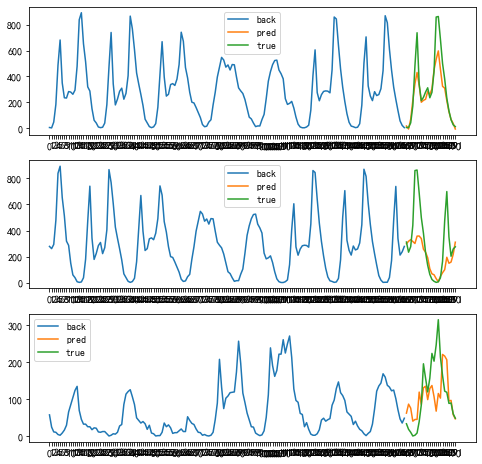

In [340]:
plot_predictions(filename, [0, 10, -1])

In [ ]:
datetime.date

In [365]:
import pytest

In [341]:
dense = layers.Dense(20)

In [344]:
inp = [tf.random.normal((10,))] * 8

In [350]:
inp_stack = tf.cast(tf.stack(inp), dtype=tf.float32)

In [351]:
out = dense(inp_stack)

In [353]:
attn_weight = tf.random.normal((10, 10))

In [356]:
tf.reduce_sum(attn_weight, axis=1)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([-2.664631  ,  3.061883  , -9.5825405 ,  0.62823796,  2.7112794 ,
        2.6904922 ,  1.4411817 , -2.2910044 , -1.691592  , -1.6382945 ],
      dtype=float32)>

In [357]:
tf.nn.softmax?

In [358]:
tf.repeat?

In [364]:
tf.tile(attn_weight, [2,3]).numpy().shape

(20, 30)

In [384]:
dense = layers.Dense(10)

In [391]:
inputs = tf.random.normal((16, 10, 20))

In [392]:
inputs = dense(inputs)

In [393]:
inputs.shape

TensorShape([16, 10, 10])

In [368]:
layer_list = []
layer_list.append(layers.Dense(10))
layer_list.append(layers.Dense(20))

In [383]:
model

In [378]:
model = keras.Sequential(layer_list)

In [379]:
inputs = keras.Input((16, 10))

In [382]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16, 10)            110       
_________________________________________________________________
dense_4 (Dense)              (None, 16, 20)            220       
Total params: 330
Trainable params: 330
Non-trainable params: 0
_________________________________________________________________


In [380]:
outputs = model(inputs)

In [381]:
outputs.shape

TensorShape([None, 16, 20])